# Prepare Dataset 
## Amazon Customer Reviews Dataset
https://s3.amazonaws.com/amazon-reviews-pds/readme.html

## Schema
- marketplace: 2-letter country code (in this case all "US").
- customer_id: Random identifier that can be used to aggregate reviews written by a single author.
- review_id: A unique ID for the review.
- product_id: The Amazon Standard Identification Number (ASIN). http://www.amazon.com/dp/<ASIN> links to the product's detail page.
- product_parent: The parent of that ASIN. Multiple ASINs (color or format variations of the same product) can roll up into a single parent.
- product_title: Title description of the product.
- product_category: Broad product category that can be used to group reviews (in this case digital videos).
- star_rating: The review's rating (1 to 5 stars).
- helpful_votes: Number of helpful votes for the review.
- total_votes: Number of total votes the review received.
- vine: Was the review written as part of the Vine program?
- verified_purchase: Was the review from a verified purchase?
- review_headline: The title of the review itself.
- review_body: The text of the review.
- review_date: The date the review was written.

In [37]:
# pip install pandas sagemaker boto3 matplotlib seaborn s3fs
import pandas as pd
import sagemaker
import boto3
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import seaborn as sns
import s3fs
import csv

## Download Datasets

In [50]:
# you need aws cli for these next commands choco install awscli on Windows and restart your console and jupyter lab for mac brew install awscli
# on mac run the below commands to download the datasets <Note this currently only works on Mac> for now..
!aws s3 cp 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz' ./data-clarify/
!aws s3 cp 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz' ./data-clarify/
!aws s3 cp 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz' ./data-clarify/

download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz to data-clarify/amazon_reviews_us_Gift_Card_v1_00.tsv.gz
download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Software_v1_00.tsv.gz to data-clarify/amazon_reviews_us_Digital_Software_v1_00.tsv.gz
download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz to data-clarify/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz


# Read in datasets into a dataframe

In [51]:
# read in giftcards
df_giftcards = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Gift_Card_v1_00.tsv.gz",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
    compression="gzip",
)
df_giftcards.shape

(149086, 15)

In [ ]:
df_giftcards

In [53]:
import mitosheet
mitosheet.sheet(df_giftcards, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-601e788d-42de-4c4b-a927-59acd0f66eaa", "code": {"imports…

In [54]:
# read in software
df_software = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Digital_Software_v1_00.tsv.gz",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
    compression="gzip",
)
df_software.shape

(102084, 15)

In [55]:
# read in videogames
df_videogames = pd.read_csv(
    "./data-clarify/amazon_reviews_us_Digital_Video_Games_v1_00.tsv.gz",
    delimiter="\t",
    quoting=csv.QUOTE_NONE,
    compression="gzip",
)
df_videogames.shape

(145431, 15)

In [ ]:
df_videogames

In [57]:
import mitosheet
mitosheet.sheet(df_videogames, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-f0f88120-858f-4c83-83f4-bce13793dfa0", "code": {"imports…

## Visualize Data

Text(0, 0.5, 'Review Count')

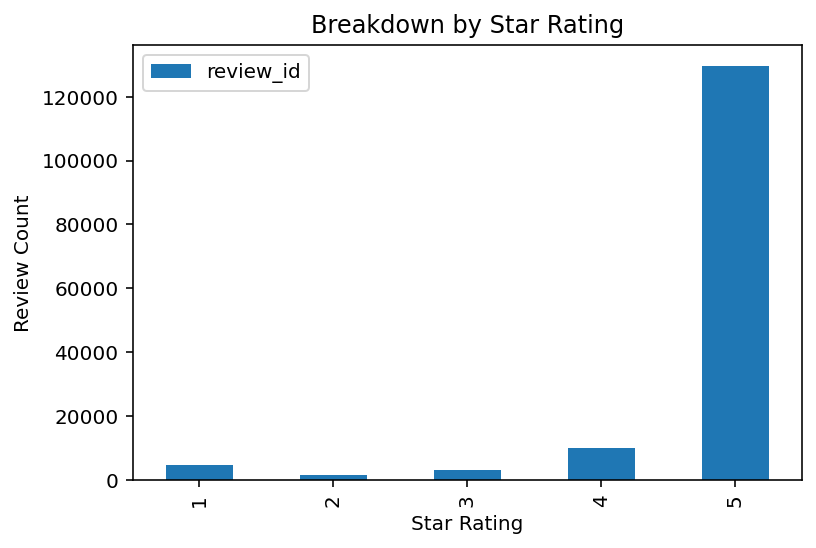

In [11]:
df_giftcards[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

Text(0, 0.5, 'Review Count')

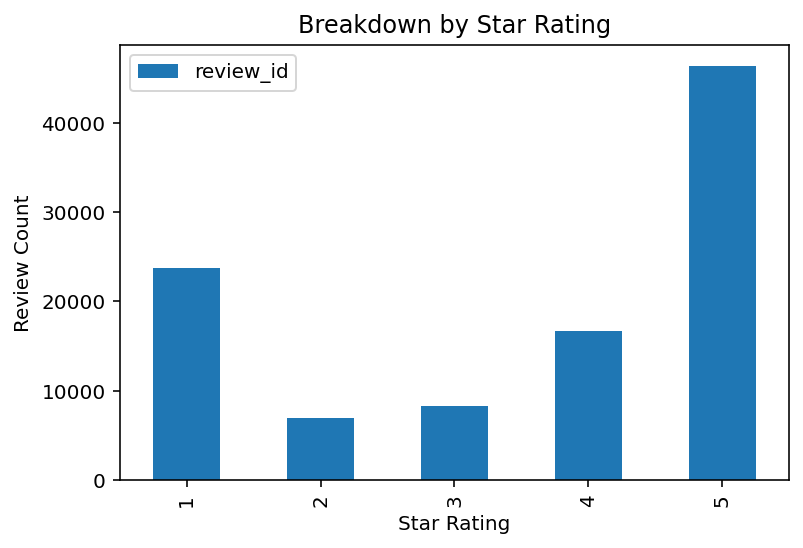

In [12]:
df_software[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

Text(0, 0.5, 'Review Count')

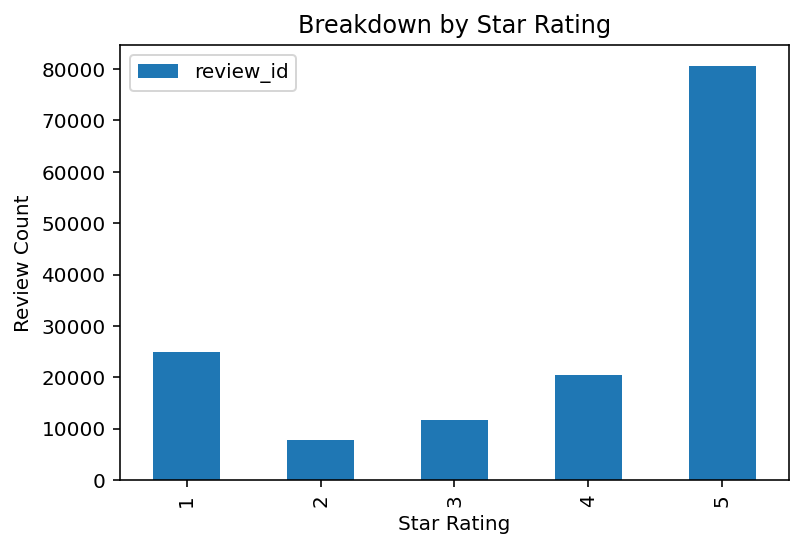

In [13]:
df_videogames[["star_rating", "review_id"]].groupby("star_rating").count().plot(
    kind="bar", title="Breakdown by Star Rating"
)
plt.xlabel("Star Rating")
plt.ylabel("Review Count")

## Combine Data Frames

In [24]:
df_giftcards.shape

(149086, 15)

In [25]:
df_software.shape

(102084, 15)

In [26]:
df_videogames.shape

(145431, 15)

In [27]:
combined_df = pd.concat([df_giftcards, df_software, df_videogames], ignore_index=True, sort=False)

In [29]:
combined_df.shape

(396601, 15)

In [ ]:
combined_df

In [59]:
import mitosheet
mitosheet.sheet(combined_df, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-0d21bbda-851b-4c22-b1c4-6fc7cb8c0312", "code": {"imports…

In [60]:
combined_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items online,It's an Amazon gift card and with over 982398324908 items I am sure you will find something you love.,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Designs)",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get these into my hands!! Thank you!,2015-08-31


In [61]:
combined_df.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
396596,US,53011810,R2G7DI8NYXZB5R,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,4,2,3,N,N,Worked first try for me,"I was worried due to the 2 reviews I saw here, but we didn't have time to wait for the package, so we took our chances.<br /><br />On top of that, we were using Parallels to run Windows xp (sp3) on an iMac!<br /><br />But though the install took a long time, it seems to be working just fine.",2008-12-25
396597,US,53094564,R3QRKP4DS759BP,B001AU6TQ8,801870836,Crazy Machines 1 - The Wacky Contraptions Game [Download],Digital_Video_Games,1,13,16,N,N,"The Software May be Great, But I'll Never Know","I downloaded this as a Christmas present for my kids. I've now spent the better part of 6 hours attempting to get it installed properly. The install process informs me that the Serial Number is wrong. Amazon says them's the breaks, and Viva Software appears to be out to lunch, perhaps permanently. This is precisely the sort of problem that makes downloadable apps such a crapshoot. Maybe it works, maybe not. But I doubt that I'll ever find out.",2008-12-24
396598,US,37181147,R24K4C0ZC3093U,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,3,3,3,N,N,Some install problems but good otherwise,"The previous reviewer is correct in noting that install takes a long time (about 20-25 minutes, even on a new machine). The main issue, however, is the missing .dll file. This was easy to find through a Google search complete with an installer that resolved the problem. Nevertheless, one would expect the software to work effectively once installed without having to seek out missing files. No other issues (e.g., the processor issue noted by the earlier review) were noted. Game play is good.",2008-09-10
396599,US,18614365,R13OA3TRCM8IBM,B001AUEITS,163061733,Crazy Machines 2 [Download],Digital_Video_Games,1,20,22,N,N,Do Not Download This!,"I downloaded this for my son's birthday yesterday and intended to install it on a laptop running Windows XP. When he tried to install the software, it took absolutely forever. Once the installation was done, the game could not be run do to a missing DLL. After several frustrating reinstalls to no avail, I decided to try it on my own computer running Windows Vista Premium. Initially, I had thought that the problem might have been that my son's laptop was relatively old and just did not have enough memory and disk space to handle the game. However, I experienced the same aggravation when trying to install it on my new computer! I did some research on the error and apparently, the game will not work due to a problem with a missing file in the OpenAL Library, which is responsible for the game sound. Although I did eventually find a patch for the the OpenAL Library, it was not an easy task. This is a known issue with this game that Amazon failed to mention. I also would have thought that it would have been the responsible thing to do to at least inform the buyer of this issue and provide a link to download the patch necessary to run the game. Stay away from this one. I wasted $[...]. I work with computers and software on a daily basis which is why I was able to figure out how to work this thing. For someone does not have any computer expertise, this game would be worthless. Also, read the Amazon disclaimer. They do not offer refunds for software downloads - which is fine by me - as long as they work! For $[...], I would have expected this thing to work without any hitches! I would have thought that Amazon ensured that the software they offer for download works before they post it for sale online. Never again. This was an absolute rip-off! UPDATE: The OpenAL patch did not work. Though it did get the inital screen to pop-up to a certain point, it still doesn't work. I also tried a pa

<AxesSubplot:xlabel='star_rating', ylabel='count'>

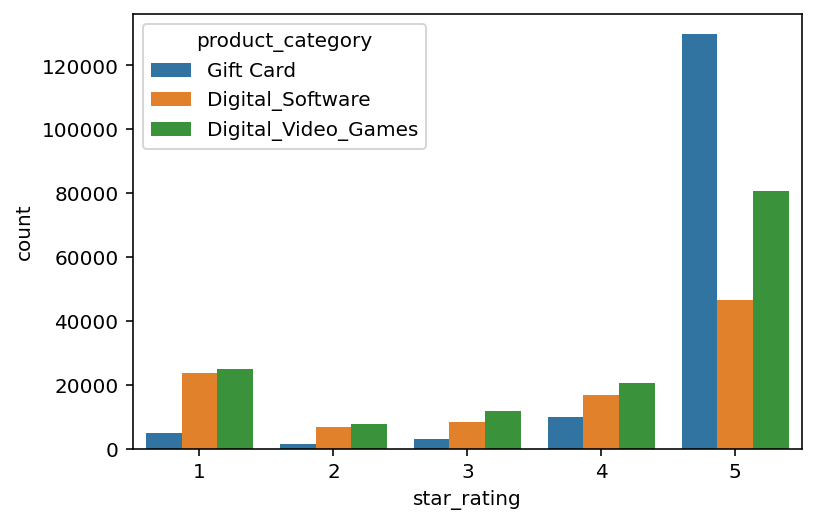

In [34]:
sns.countplot(data=combined_df, x="star_rating", hue="product_category")

## Balance the Dataset by Product Category and Star Rating

In [62]:
df_grouped_by = combined_df.groupby(["product_category", "star_rating"])[["product_category", "star_rating"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape


(23535, 2)

<AxesSubplot:xlabel='star_rating', ylabel='count'>

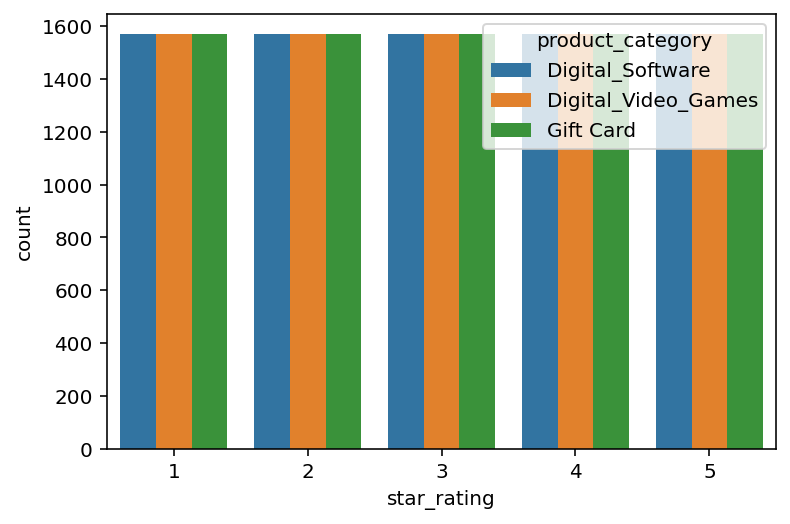

In [63]:
sns.countplot(data=df_balanced, x="star_rating", hue="product_category")